In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlb
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

from IPython.display import display
import os
#plt.style.use("seaborn")
%matplotlib inline  
import warnings
warnings.filterwarnings("ignore")

In [57]:
cac_data = pd.read_csv('cac_dataset\customer_acquisition_costs.csv')
cac_data.sample(5)

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
42609,Breakfast Foods,Frozen Foods,Food,6.52,3.1296,4.0,Cash Register Lottery,USA,S,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio, TV",55.59
37505,Eggs,Eggs,Food,11.22,3.7026,3.0,Two for One,Mexico,M,F,...,21938.0,5188.0,3458.0,1.0,1.0,1.0,1.0,1.0,Cash Register Handout,68.63
19080,Snack Foods,Snack Foods,Food,7.52,2.7824,4.0,Free For All,USA,S,F,...,24390.0,9184.0,6122.0,0.0,0.0,1.0,1.0,0.0,Radio,140.90
5235,Vegetables,Produce,Food,14.35,6.7445,5.0,Sale Winners,Mexico,S,F,...,20141.0,6393.0,4262.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,99.38
3068,Vegetables,Produce,Food,10.53,4.6332,3.0,Pick Your Savings,USA,M,M,...,13305.0,4746.0,3164.0,1.0,0.0,0.0,0.0,0.0,In-Store Coupon,83.51


In [58]:
cac_data = cac_data.drop(["avg_cars_at home(approx).1"], axis=1)

In [59]:
cac_data.shape

(60428, 39)

In [60]:
cac_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   food_category             60428 non-null  object 
 1   food_department           60428 non-null  object 
 2   food_family               60428 non-null  object 
 3   store_sales(in millions)  60428 non-null  float64
 4   store_cost(in millions)   60428 non-null  float64
 5   unit_sales(in millions)   60428 non-null  float64
 6   promotion_name            60428 non-null  object 
 7   sales_country             60428 non-null  object 
 8   marital_status            60428 non-null  object 
 9   gender                    60428 non-null  object 
 10  total_children            60428 non-null  float64
 11  education                 60428 non-null  object 
 12  member_card               60428 non-null  object 
 13  occupation                60428 non-null  object 
 14  houseo

In [61]:
cac_data.isna().sum()

food_category               0
food_department             0
food_family                 0
store_sales(in millions)    0
store_cost(in millions)     0
unit_sales(in millions)     0
promotion_name              0
sales_country               0
marital_status              0
gender                      0
total_children              0
education                   0
member_card                 0
occupation                  0
houseowner                  0
avg_cars_at home(approx)    0
avg. yearly_income          0
num_children_at_home        0
brand_name                  0
SRP                         0
gross_weight                0
net_weight                  0
recyclable_package          0
low_fat                     0
units_per_case              0
store_type                  0
store_city                  0
store_state                 0
store_sqft                  0
grocery_sqft                0
frozen_sqft                 0
meat_sqft                   0
coffee_bar                  0
video_stor

In [62]:
cac_data.describe().T.style.bar(subset=['mean'], color='#E68193').background_gradient(subset=['std'], cmap='mako_r').background_gradient(subset=['50%'], cmap='mako')

,count,mean,std,min,25%,50%,75%,max
store_sales(in millions),60428.000000,6.541031,3.463047,0.510000,3.810000,5.940000,8.670000,22.920000
store_cost(in millions),60428.000000,2.619460,1.453009,0.163200,1.500000,2.385600,3.484025,9.726500
unit_sales(in millions),60428.000000,3.093169,0.827677,1.000000,3.000000,3.000000,4.000000,6.000000
total_children,60428.000000,2.533875,1.490165,0.000000,1.000000,3.000000,4.000000,5.000000
avg_cars_at home(approx),60428.000000,2.200271,1.109644,0.000000,1.000000,2.000000,3.000000,4.000000
num_children_at_home,60428.000000,0.829351,1.303424,0.000000,0.000000,0.000000,1.000000,5.000000
SRP,60428.000000,2.115258,0.932829,0.500000,1.410000,2.130000,2.790000,3.980000
gross_weight,60428.000000,13.806433,4.622693,6.000000,9.700000,13.600000,17.700000,21.900000
net_weight,60428.000000,11.796289,4.682986,3.050000,7.710000,11.600000,16.000000,20.800000
recyclable_package,60428.000000,0.558665,0.496551,0.000000,0.000000,1.000000,1.000000,1.000000


##### The above helps realise that there is a huge difference in the scale of the columns which might affect distance based machine learning models

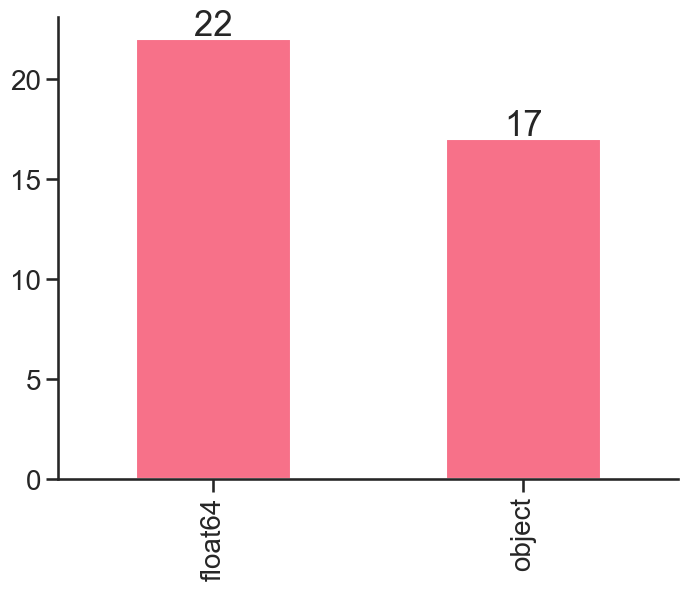

In [63]:
sns.set(style="ticks", context="talk",font_scale = 1,palette="husl")
plt.figure(figsize = (8,6))
ax = cac_data.dtypes.value_counts().plot(kind='bar',grid = False,fontsize=20)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 0.2, height, ha = 'center', size = 25)
sns.despine()

In [64]:
cac_columns = list(cac_data.columns)

In [65]:
categorical_features = cac_data.select_dtypes(include="object").columns
numerical_features = cac_data.select_dtypes(exclude="object").columns

In [66]:
nums_f = ['store_sales(in millions)', 'store_cost(in millions)','SRP','gross_weight', 'net_weight','cost']
cats_f = [col for col in cac_columns if col not in nums_f]
len(cats_f), len(nums_f)

(33, 6)

In [67]:
from scipy.stats import skew, kurtosis
sk = skew(cac_data[nums_f[0]], axis=0, bias=True)
k = kurtosis(cac_data[nums_f[0]], axis=0, bias=True)
sk,k

(0.678365928582688, 0.09289535812976668)

In [68]:
categorical_features

Index(['food_category', 'food_department', 'food_family', 'promotion_name',
       'sales_country', 'marital_status', 'gender', 'education', 'member_card',
       'occupation', 'houseowner', 'avg. yearly_income', 'brand_name',
       'store_type', 'store_city', 'store_state', 'media_type'],
      dtype='object')

In [69]:
numerical_features

Index(['store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'total_children', 'avg_cars_at home(approx)',
       'num_children_at_home', 'SRP', 'gross_weight', 'net_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store',
       'salad_bar', 'prepared_food', 'florist', 'cost'],
      dtype='object')

store_sales(in millions) : 1033
store_cost(in millions) : 9919
unit_sales(in millions) : 6
total_children : 6
avg_cars_at home(approx) : 5
num_children_at_home : 6
SRP : 315
gross_weight : 376
net_weight : 332
recyclable_package : 2
low_fat : 2
units_per_case : 36
store_sqft : 20
grocery_sqft : 20
frozen_sqft : 20
meat_sqft : 20
coffee_bar : 2
video_store : 2
salad_bar : 2
prepared_food : 2
florist : 2
cost : 328


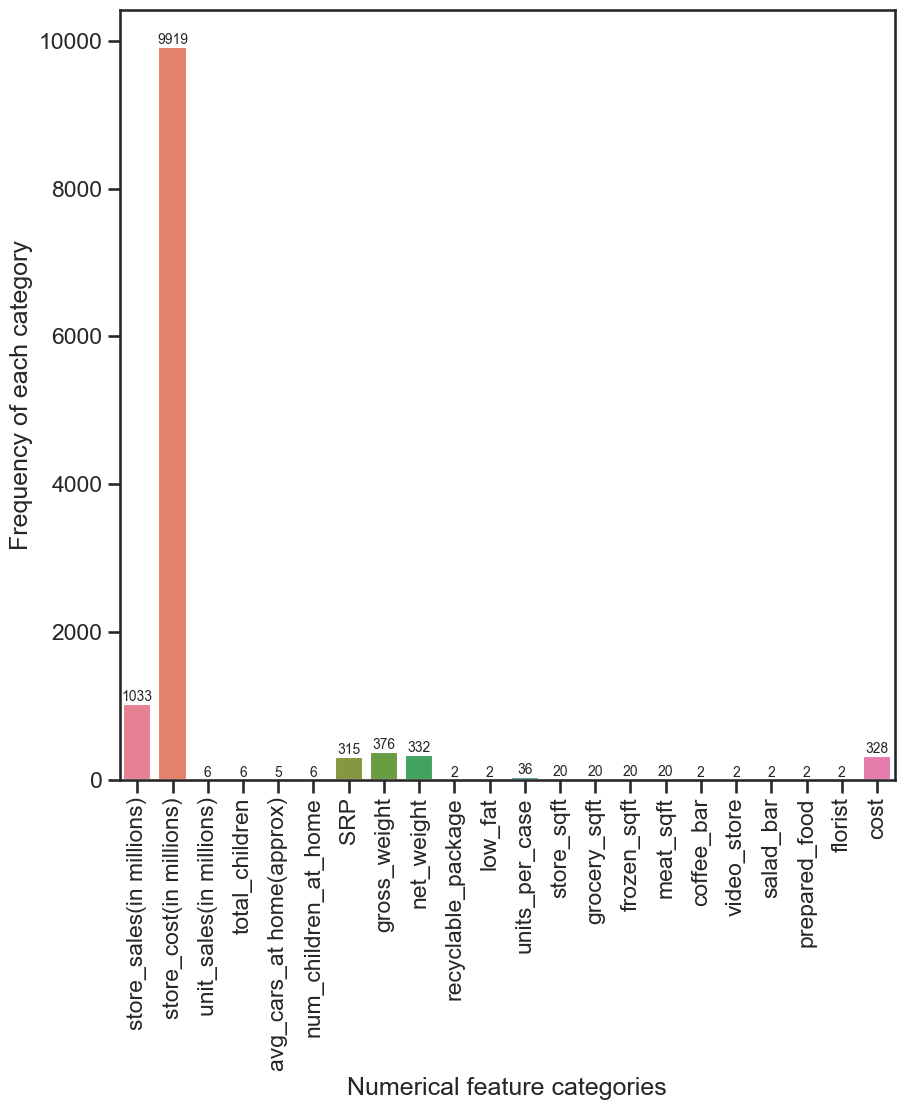

In [70]:
numerical_categories = cac_data[numerical_features].nunique()
for col in numerical_features:
    print(f'{col} : {numerical_categories[col]}')

plt.figure(figsize = (10,10))
plt.xlabel('Numerical feature categories')
plt.xticks(rotation = 90)
plt.ylabel('Frequency of each category')
ax = sns.barplot(x = numerical_features, y = numerical_categories, palette = 'husl')
for i in ax.containers:
    ax.bar_label(i, label_type = 'edge', fontsize = 10)

In [71]:
numerical_categories

store_sales(in millions)    1033
store_cost(in millions)     9919
unit_sales(in millions)        6
total_children                 6
avg_cars_at home(approx)       5
num_children_at_home           6
SRP                          315
gross_weight                 376
net_weight                   332
recyclable_package             2
low_fat                        2
units_per_case                36
store_sqft                    20
grocery_sqft                  20
frozen_sqft                   20
meat_sqft                     20
coffee_bar                     2
video_store                    2
salad_bar                      2
prepared_food                  2
florist                        2
cost                         328
dtype: int64

food_category : 45
food_department : 22
food_family : 3
promotion_name : 49
sales_country : 3
marital_status : 2
gender : 2
education : 5
member_card : 4
occupation : 5
houseowner : 2
avg. yearly_income : 8
brand_name : 111
store_type : 5
store_city : 19
store_state : 10
media_type : 13


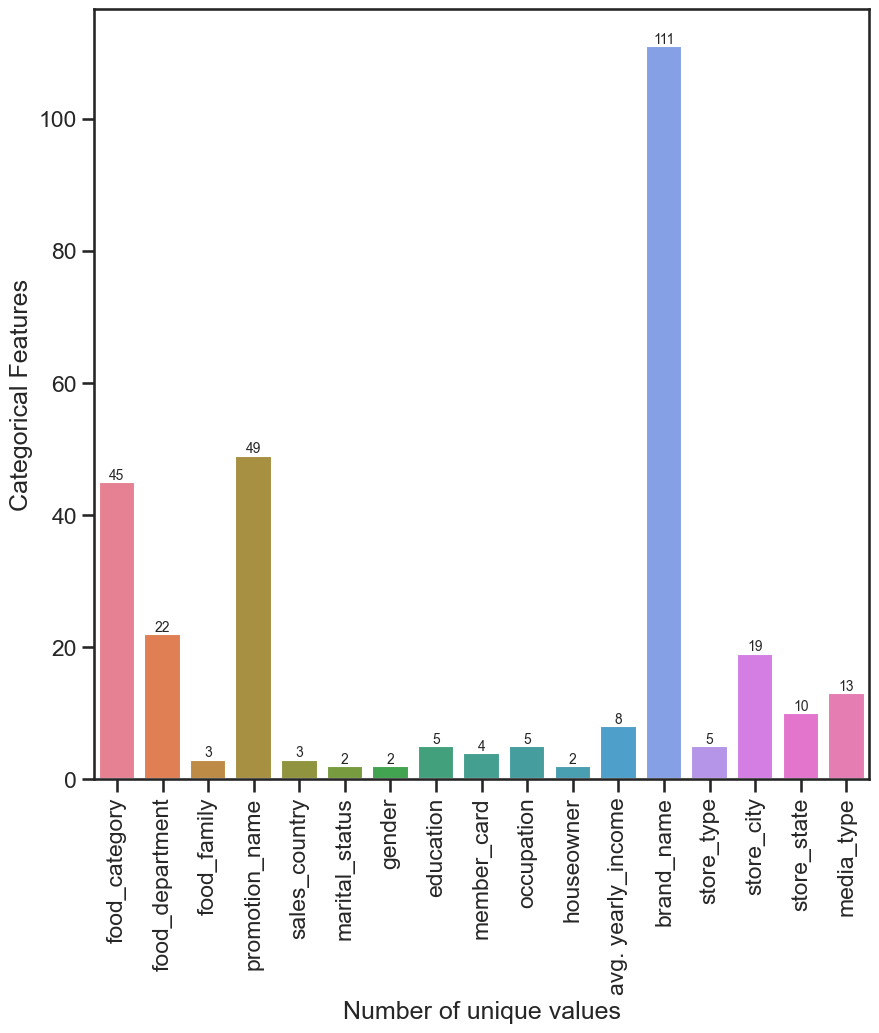

In [72]:
categorical_categories = cac_data[categorical_features].nunique()
for col in categorical_features:
    print(f'{col} : {categorical_categories[col]}')

plt.figure(figsize = (10,10))
plt.xlabel('Number of unique values')
plt.xticks(rotation = 90)
plt.ylabel('Categorical Features')
ax = sns.barplot(x = categorical_features, y = categorical_categories, palette = 'husl')
for i in ax.containers:
    ax.bar_label(i, label_type = 'edge', fontsize = 10)

In [73]:
categories_dictionary = {col : list(cac_data[col].unique()) for col in categorical_features}
for key in categories_dictionary.keys():
    print(f'{key} : {categories_dictionary[key]}')

food_category : ['Breakfast Foods', 'Bread', 'Canned Shrimp', 'Baking Goods', 'Vegetables', 'Frozen Desserts', 'Candy', 'Snack Foods', 'Dairy', 'Starchy Foods', 'Cleaning Supplies', 'Decongestants', 'Meat', 'Hot Beverages', 'Jams and Jellies', 'Carbonated Beverages', 'Seafood', 'Specialty', 'Kitchen Products', 'Electrical', 'Beer and Wine', 'Candles', 'Fruit', 'Pure Juice Beverages', 'Canned Soup', 'Paper Products', 'Canned Tuna', 'Eggs', 'Hardware', 'Canned Sardines', 'Canned Clams', 'Pain Relievers', 'Side Dishes', 'Bathroom Products', 'Magazines', 'Frozen Entrees', 'Pizza', 'Cold Remedies', 'Canned Anchovies', 'Drinks', 'Hygiene', 'Plastic Products', 'Canned Oysters', 'Packaged Vegetables', 'Miscellaneous']
food_department : ['Frozen Foods', 'Baked Goods', 'Canned Foods', 'Baking Goods', 'Produce', 'Snacks', 'Snack Foods', 'Dairy', 'Starchy Foods', 'Household', 'Health and Hygiene', 'Meat', 'Beverages', 'Seafood', 'Deli', 'Alcoholic Beverages', 'Canned Products', 'Eggs', 'Periodical

In [74]:
list(cac_data["media_type"].unique())

['Daily Paper, Radio',
 'In-Store Coupon',
 'Radio',
 'Daily Paper',
 'Product Attachment',
 'Sunday Paper, Radio',
 'Sunday Paper, Radio, TV',
 'Sunday Paper',
 'Street Handout',
 'TV',
 'Bulk Mail',
 'Cash Register Handout',
 'Daily Paper, Radio, TV']

In [75]:
np.transpose(list(cac_data["media_type"].value_counts()))

array([6820, 5371, 5284, 5119, 5069, 4980, 4859, 4495, 4050, 4002, 3576,
       3457, 3346])

In [76]:
dict = {cac_data["media_type"].unique()[i] : cac_data["media_type"].value_counts()[i] for i in range(len(cac_data["media_type"].unique()))}

In [77]:
option_cat_df = pd.DataFrame(dict.items(), columns = ["media_type", "Count"])

In [78]:
list(option_cat_df["media_type"])

['Daily Paper, Radio',
 'In-Store Coupon',
 'Radio',
 'Daily Paper',
 'Product Attachment',
 'Sunday Paper, Radio',
 'Sunday Paper, Radio, TV',
 'Sunday Paper',
 'Street Handout',
 'TV',
 'Bulk Mail',
 'Cash Register Handout',
 'Daily Paper, Radio, TV']

In [79]:
dict

{'Daily Paper, Radio': 6820,
 'In-Store Coupon': 5371,
 'Radio': 5284,
 'Daily Paper': 5119,
 'Product Attachment': 5069,
 'Sunday Paper, Radio': 4980,
 'Sunday Paper, Radio, TV': 4859,
 'Sunday Paper': 4495,
 'Street Handout': 4050,
 'TV': 4002,
 'Bulk Mail': 3576,
 'Cash Register Handout': 3457,
 'Daily Paper, Radio, TV': 3346}

##### NO. of children for a customer

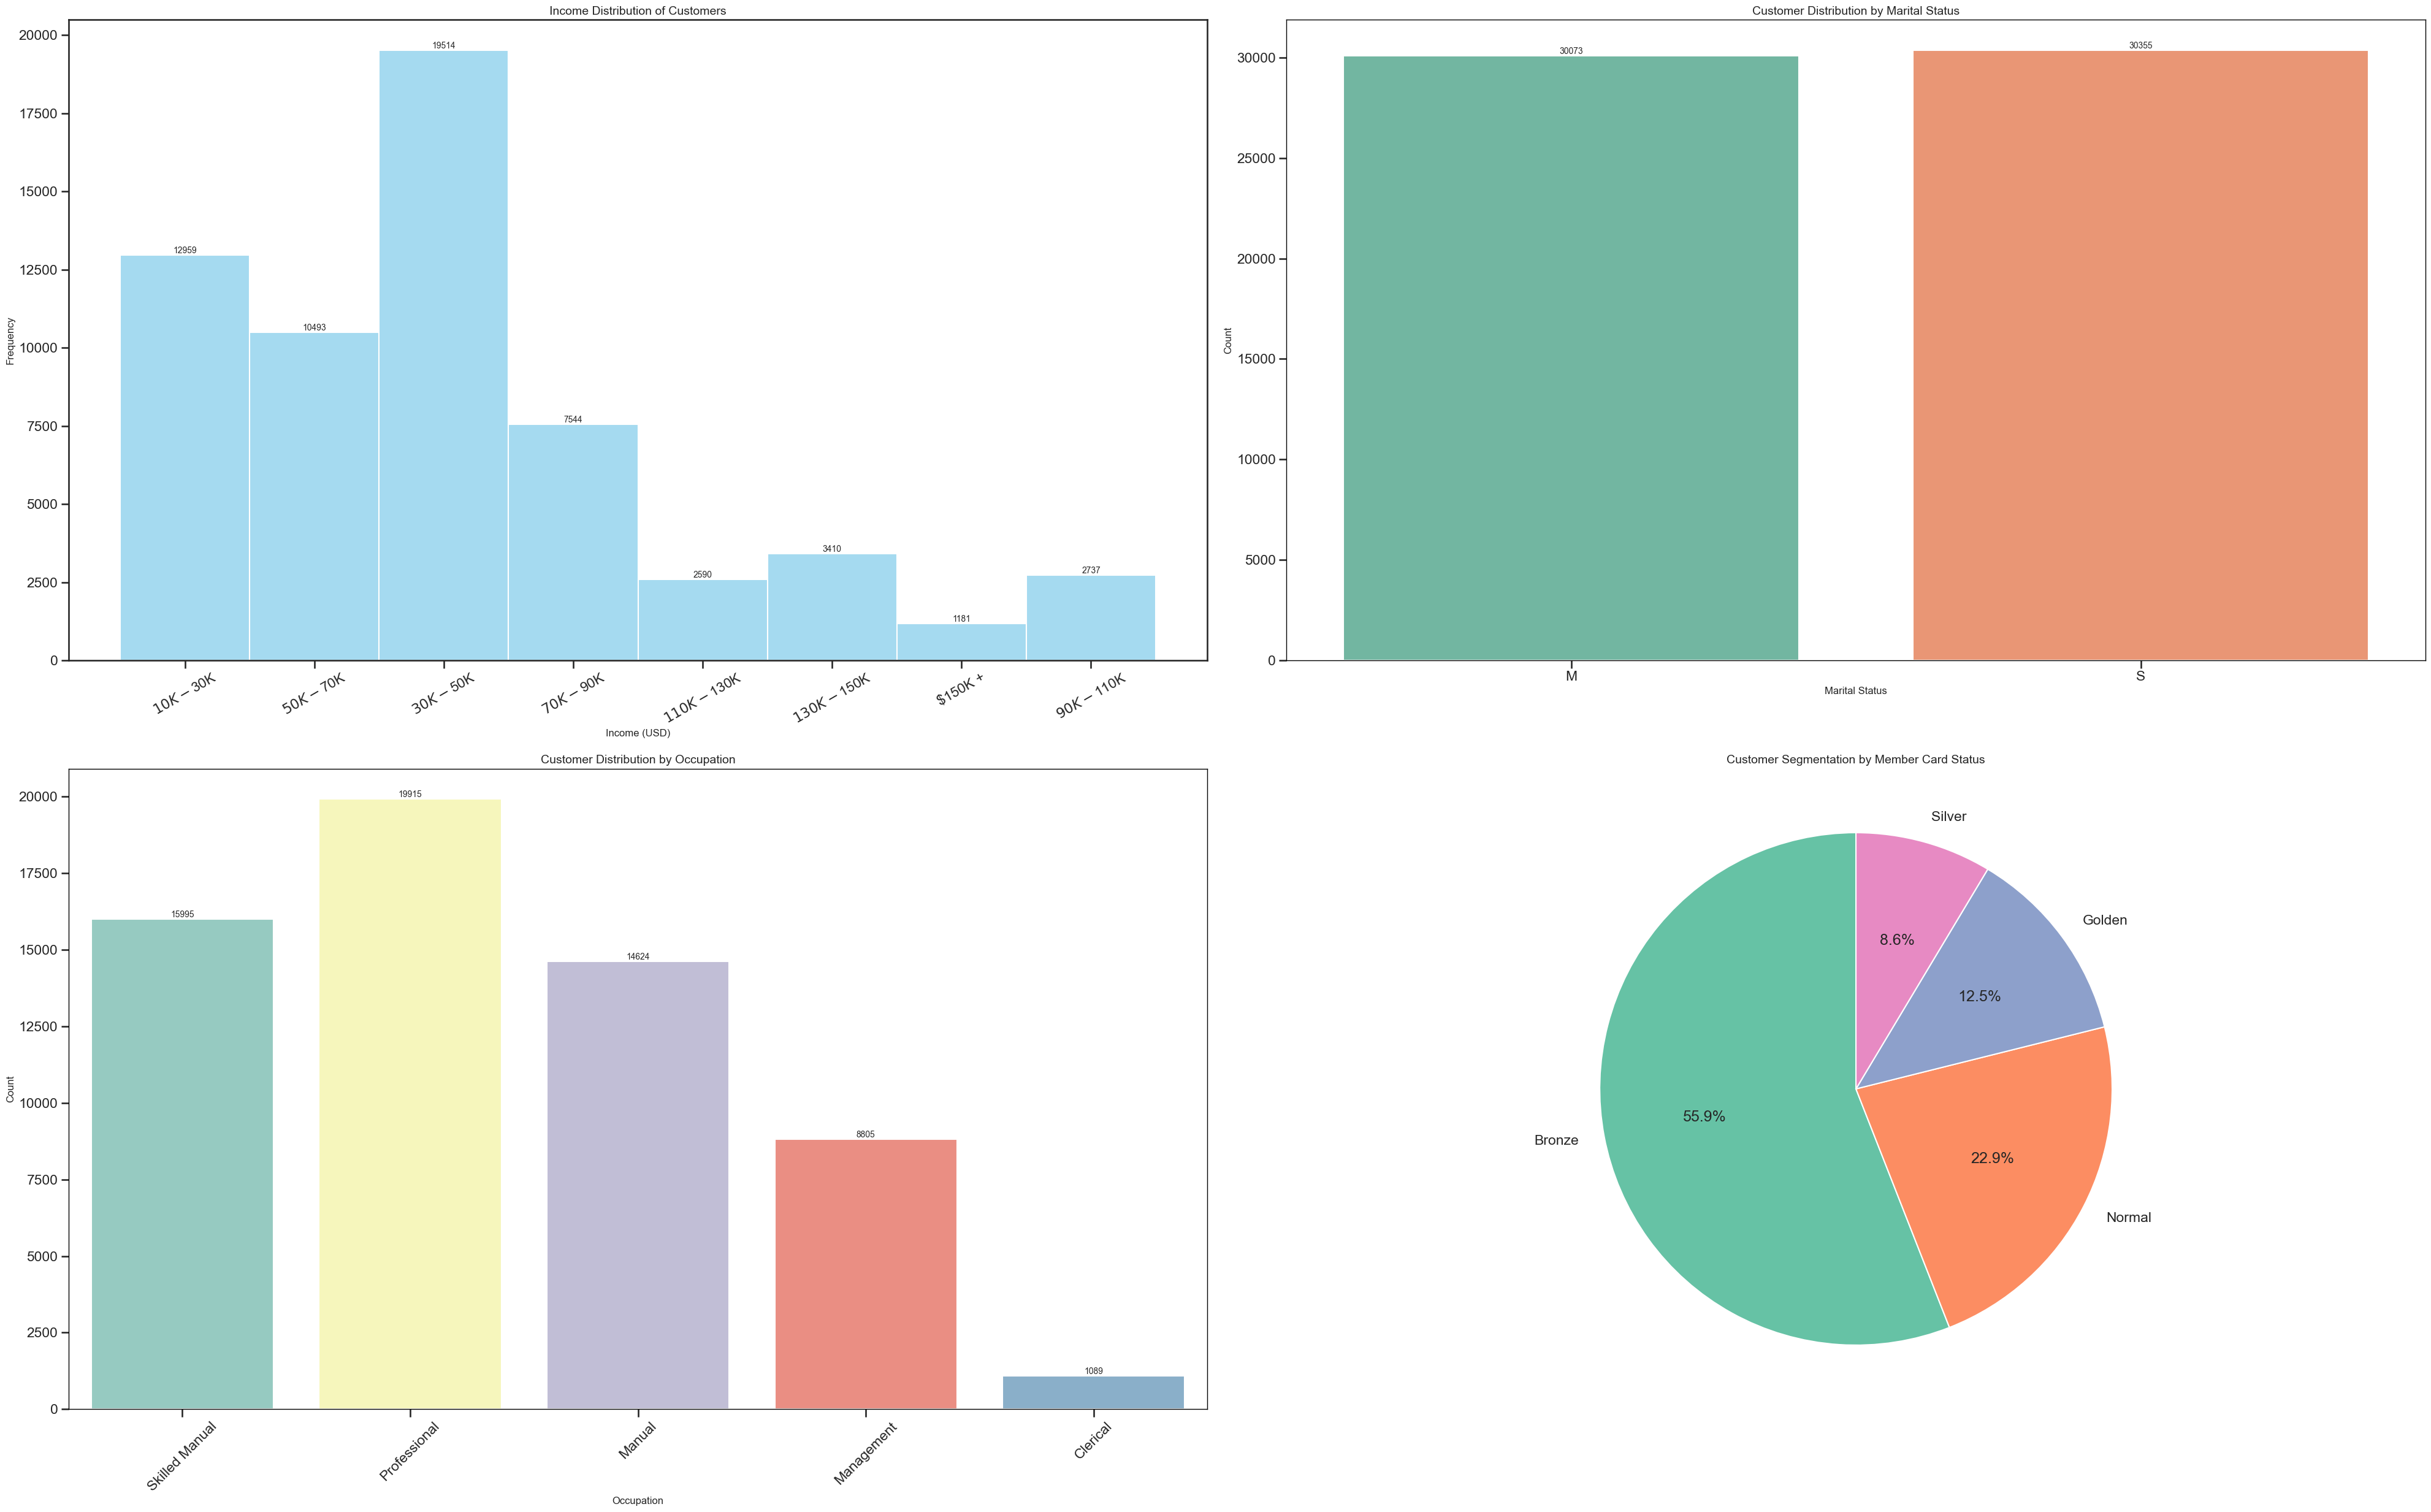

In [80]:
fig, axes = plt.subplots(2, 2, figsize=(40, 25))

# 1. Histogram for Customer Income Distribution
sns.histplot(cac_data['avg. yearly_income'], kde=False, color="skyblue", ax=axes[0, 0])
axes[0, 0].set_title('Income Distribution of Customers', fontsize=14)
axes[0, 0].set_xlabel('Income (USD)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=30)
for i in axes[0,0].containers:
    axes[0,0].bar_label(i, label_type = 'edge', fontsize = 10)  # Rotate x labels for better readability

# 2. Countplot for Customer Demographics (Marital Status)
sns.countplot(x='marital_status', data=cac_data, palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Customer Distribution by Marital Status', fontsize=14)
axes[0, 1].set_xlabel('Marital Status', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)
for i in axes[0,1].containers:
    axes[0,1].bar_label(i, label_type = 'edge', fontsize = 10)
# Add borders around the plot
for spine in axes[0, 1].spines.values():
    spine.set_edgecolor('black')  # Set the color of the border
    spine.set_linewidth(1)  # Set the width of the border

# 3. Countplot for Customer Occupation
sns.countplot(x='occupation', data=cac_data, palette='Set3', ax=axes[1, 0])
axes[1, 0].set_title('Customer Distribution by Occupation', fontsize=14)
axes[1, 0].set_xlabel('Occupation', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability
for i in axes[1,0].containers:
    axes[1,0].bar_label(i, label_type = 'edge', fontsize = 10)
# Add borders around the plot
for spine in axes[1, 0].spines.values():
    spine.set_edgecolor('black')  # Set the color of the border
    spine.set_linewidth(1)  # Set the width of the border

# 4. Pie Chart for Customer Segmentation (Member Card Status)
customer_segments = cac_data['member_card'].value_counts()
axes[1, 1].pie(customer_segments, autopct='%1.1f%%', colors=sns.color_palette('Set2'), labels=customer_segments.index, startangle=90)
axes[1, 1].set_title('Customer Segmentation by Member Card Status', fontsize=14)
# Add borders around the pie chart
for spine in axes[1, 1].spines.values():
    spine.set_edgecolor('black')  # Set the color of the border
    spine.set_linewidth(1)  # Set the width of the border

plt.tight_layout()
plt.show()

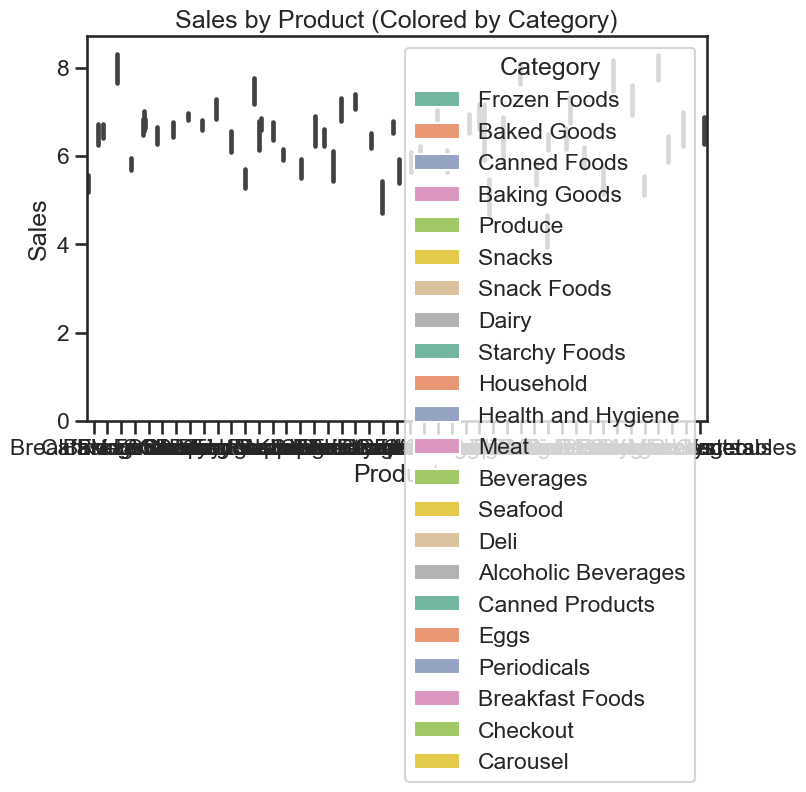

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample dataset
data = pd.DataFrame({
    'Product': ['Laptop', 'Shirt', 'Sofa', 'Phone', 'Pants'],
    'Sales': [500, 300, 700, 600, 400],
    'Category': ['Electronics', 'Clothing', 'Furniture', 'Electronics', 'Clothing']
})

# Create a bar chart with colors based on the 'Category' column
plt.figure(figsize=(8, 5))
sns.barplot(x=cats_f[0], y=nums_f[0], hue=cats_f[1], data=cac_data, palette='Set2')

# Labels and title
plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('Sales by Product (Colored by Category)')
plt.legend(title='Category')

# Show the plot
plt.show()


In [82]:
cac_data["avg_cars_at home(approx)"].value_counts()

avg_cars_at home(approx)
2.0    18268
3.0    16961
1.0    13643
4.0     7974
0.0     3582
Name: count, dtype: int64

In [83]:
cac_data["avg_cars_at home(approx)"].value_counts()[0]

3582

In [84]:
cac_data["store_sqft"].unique()

array([27694., 33858., 21215., 30268., 23598., 23688., 20319., 28206.,
       34791., 30797., 38382., 30584., 36509., 23112., 39696., 23759.,
       24597., 23593., 22478., 34452.])

In [85]:
cac_data["store_sqft"].value_counts()

store_sqft
33858.0    5704
27694.0    5478
20319.0    5150
21215.0    5051
30797.0    4498
30268.0    4453
23688.0    4151
23598.0    3960
30584.0    3890
39696.0    3451
23112.0    3384
34791.0    2621
23759.0    2352
23593.0    1506
36509.0    1395
38382.0     871
22478.0     783
28206.0     711
34452.0     580
24597.0     439
Name: count, dtype: int64

In [86]:
cac_data["food_department"].value_counts()

food_department
Produce                8521
Snack Foods            6919
Household              6185
Frozen Foods           6126
Baking Goods           4497
Canned Foods           4238
Dairy                  3835
Health and Hygiene     3807
Beverages              3014
Deli                   2787
Baked Goods            1797
Alcoholic Beverages    1590
Snacks                 1538
Starchy Foods          1103
Periodicals             971
Eggs                    952
Breakfast Foods         778
Canned Products         400
Checkout                385
Meat                    385
Seafood                 375
Carousel                225
Name: count, dtype: int64

In [87]:
dict = {i : cac_data["unit_sales(in millions)"].value_counts()[i] for i in cac_data["unit_sales(in millions)"].unique()}

In [88]:
dict

{4.0: 16581, 3.0: 27482, 2.0: 13417, 5.0: 2058, 6.0: 26, 1.0: 864}

In [89]:
numerical_features

Index(['store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'total_children', 'avg_cars_at home(approx)',
       'num_children_at_home', 'SRP', 'gross_weight', 'net_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store',
       'salad_bar', 'prepared_food', 'florist', 'cost'],
      dtype='object')

In [90]:
categorical_features

Index(['food_category', 'food_department', 'food_family', 'promotion_name',
       'sales_country', 'marital_status', 'gender', 'education', 'member_card',
       'occupation', 'houseowner', 'avg. yearly_income', 'brand_name',
       'store_type', 'store_city', 'store_state', 'media_type'],
      dtype='object')

In [91]:
color_list = []
for col in numerical_features:
    if np.max(cac_data[col])<7 and col!='SRP':
        color_list.append(col)
        print(col,np.min(cac_data[col]), np.max(cac_data[col]))

unit_sales(in millions) 1.0 6.0
total_children 0.0 5.0
avg_cars_at home(approx) 0.0 4.0
num_children_at_home 0.0 5.0
recyclable_package 0.0 1.0
low_fat 0.0 1.0
coffee_bar 0.0 1.0
video_store 0.0 1.0
salad_bar 0.0 1.0
prepared_food 0.0 1.0
florist 0.0 1.0


In [92]:
for col in categorical_features:
    if len(cac_data[col].unique())<6:
        color_list.append(col)

In [93]:
color_list

['unit_sales(in millions)',
 'total_children',
 'avg_cars_at home(approx)',
 'num_children_at_home',
 'recyclable_package',
 'low_fat',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist',
 'food_family',
 'sales_country',
 'marital_status',
 'gender',
 'education',
 'member_card',
 'occupation',
 'houseowner',
 'store_type']

In [94]:
color_list = ['unit_sales(in millions)','total_children','avg_cars_at home(approx)','num_children_at_home','recyclable_package',
 'low_fat','coffee_bar','video_store','salad_bar','prepared_food','florist','food_family','sales_country','marital_status',
 'gender','education','member_card','occupation','houseowner','store_type']

In [95]:
prod_sales = cac_data.groupby('food_category')
sales_by_product = prod_sales['unit_sales(in millions)'].mean().reset_index()
sales_by_product = sales_by_product.sort_values(by='unit_sales(in millions)',ascending=False)[1:11]

In [96]:
sales_by_product.iloc[0][0]

'Canned Clams'

In [97]:
avg_sales = cac_data.groupby(['gender', 'food_category'])['unit_sales(in millions)'].mean().reset_index()
top_products = avg_sales.groupby('gender').apply(lambda x: x.nlargest(10, 'unit_sales(in millions)')).reset_index(drop=True)

In [98]:
top_products

,gender,food_category,unit_sales(in millions)
0,F,Canned Clams,3.204082
1,F,Plastic Products,3.182759
2,F,Frozen Entrees,3.164474
3,F,Paper Products,3.139706
4,F,Pure Juice Beverages,3.129973
5,F,Pain Relievers,3.129330
6,F,Beer and Wine,3.122525
7,F,Miscellaneous,3.121495
8,F,Specialty,3.119565
9,F,Candy,3.115433


In [99]:
cac_data['store_type'].unique()

array(['Deluxe Supermarket', 'Supermarket', 'Gourmet Supermarket',
       'Small Grocery', 'Mid-Size Grocery'], dtype=object)

In [100]:
deluxe_data = cac_data[cac_data['store_type']=="Deluxe Supermarket"] 
deluxe_data

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60393,Specialty,Carousel,Non-Consumable,4.60,1.7020,2.0,Green Light Special,Canada,M,F,...,16418.0,4016.0,2678.0,1.0,1.0,1.0,1.0,1.0,Product Attachment,97.13
60394,Specialty,Carousel,Non-Consumable,11.04,3.7536,4.0,Price Smashers,Canada,S,F,...,16418.0,4016.0,2678.0,1.0,1.0,1.0,1.0,1.0,Street Handout,95.45
60395,Specialty,Carousel,Non-Consumable,2.97,1.1880,3.0,Green Light Special,Canada,M,F,...,16418.0,4016.0,2678.0,1.0,1.0,1.0,1.0,1.0,Product Attachment,97.13
60396,Specialty,Carousel,Non-Consumable,3.96,1.5048,4.0,I Cant Believe It Sale,Canada,M,M,...,16418.0,4016.0,2678.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio, TV",102.47


In [101]:
deluxe_data['store_type'].unique()

array(['Deluxe Supermarket'], dtype=object)

In [102]:
pd.DataFrame([cac_columns]).T

,0
0,food_category
1,food_department
2,food_family
3,store_sales(in millions)
4,store_cost(in millions)
5,unit_sales(in millions)
6,promotion_name
7,sales_country
8,marital_status
9,gender


In [103]:
["promotion_name","sales_country","marital_status","gender","member_card", "occupation" "yearly_income","store_type","media_type"]
["coffee_bar","video_store","salad_bar","prepared_food","florist"]

['coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist']

In [104]:
prod_cost = cac_data.groupby('food_category')
cost_by_product = prod_cost['store_cost(in millions)'].sum().reset_index()
cost_by_product = cost_by_product.sort_values(by='store_cost(in millions)',ascending=False)

In [105]:
prod_cost = cac_data.groupby('food_department')
cost_by_product = prod_cost['store_cost(in millions)'].sum().reset_index()
cost_by_product = cost_by_product.sort_values(by='store_cost(in millions)',ascending=False)

In [106]:
cost_by_product

,food_department,store_cost(in millions)
17,Produce,22787.2701
19,Snack Foods,19115.3878
14,Household,17043.4544
12,Frozen Foods,15647.3022
5,Canned Foods,10876.5089
2,Baking Goods,10655.7569
9,Dairy,10335.8544
13,Health and Hygiene,9577.4205
3,Beverages,7591.0691
10,Deli,7217.5224


In [107]:
prod_sale = cac_data.groupby('food_department')
sales_by_product = prod_sale['store_sales(in millions)'].sum().reset_index()
sales_by_product = sales_by_product.sort_values(by='store_sales(in millions)',ascending=False)

In [108]:
sales_by_product

,food_department,store_sales(in millions)
17,Produce,56914.58
19,Snack Foods,47726.96
14,Household,42579.56
12,Frozen Foods,39055.11
5,Canned Foods,27085.84
2,Baking Goods,26714.37
9,Dairy,25705.33
13,Health and Hygiene,23860.63
3,Beverages,19003.40
10,Deli,18068.32


In [109]:
product_insg = sales_by_product.join(cost_by_product.set_index('food_department'), on='food_department')

In [110]:
product_insg["revenue(in millions)"] = product_insg["store_sales(in millions)"] - product_insg["store_cost(in millions)"]

In [111]:
product_insg

,food_department,store_sales(in millions),store_cost(in millions),revenue(in millions)
17,Produce,56914.58,22787.2701,34127.3099
19,Snack Foods,47726.96,19115.3878,28611.5722
14,Household,42579.56,17043.4544,25536.1056
12,Frozen Foods,39055.11,15647.3022,23407.8078
5,Canned Foods,27085.84,10876.5089,16209.3311
2,Baking Goods,26714.37,10655.7569,16058.6131
9,Dairy,25705.33,10335.8544,15369.4756
13,Health and Hygiene,23860.63,9577.4205,14283.2095
3,Beverages,19003.40,7591.0691,11412.3309
10,Deli,18068.32,7217.5224,10850.7976


In [112]:
cac_data["media_type"].unique()

array(['Daily Paper, Radio', 'In-Store Coupon', 'Radio', 'Daily Paper',
       'Product Attachment', 'Sunday Paper, Radio',
       'Sunday Paper, Radio, TV', 'Sunday Paper', 'Street Handout', 'TV',
       'Bulk Mail', 'Cash Register Handout', 'Daily Paper, Radio, TV'],
      dtype=object)

In [113]:
data_copy = cac_data.copy()

In [114]:
def clean_media_type(value):
    if 'Daily' in value:
        value = "Daily Media"
    elif 'Sunday' in value:
        value = "Sunday Media"
    return value
data_copy["media_type"] = data_copy["media_type"].apply(clean_media_type)

In [115]:
data_copy["media_type"].unique()

array(['Daily Media', 'In-Store Coupon', 'Radio', 'Product Attachment',
       'Sunday Media', 'Street Handout', 'TV', 'Bulk Mail',
       'Cash Register Handout'], dtype=object)

In [116]:
data_copy["media_type"].unique()

array(['Daily Media', 'In-Store Coupon', 'Radio', 'Product Attachment',
       'Sunday Media', 'Street Handout', 'TV', 'Bulk Mail',
       'Cash Register Handout'], dtype=object)

In [117]:
cac_data["sales_country"]

0           USA
1           USA
2           USA
3           USA
4           USA
          ...  
60423       USA
60424       USA
60425       USA
60426    Canada
60427    Canada
Name: sales_country, Length: 60428, dtype: object

In [118]:
asset_data = cac_data.groupby(['houseowner','avg_cars_at home(approx)'])
# sales_by_product = prod_sale['store_sales(in millions)'].sum().reset_index()
# sales_by_product = sales_by_product.sort_values(by='store_sales(in millions)',ascending=False)

In [119]:
sales_by_asset = asset_data['store_sales(in millions)'].sum().reset_index().sort_values(by='store_sales(in millions)',ascending=False)

In [120]:
costs_by_asset = asset_data['store_cost(in millions)'].sum().reset_index().sort_values(by='store_cost(in millions)',ascending=False)

In [121]:
costs_by_asset

,houseowner,avg_cars_at home(approx),store_cost(in millions)
8,Y,3.0,28984.8883
7,Y,2.0,28261.2261
6,Y,1.0,19693.9163
2,N,2.0,19602.8804
1,N,1.0,16021.9924
3,N,3.0,15378.6534
9,Y,4.0,13441.1743
4,N,4.0,7564.4451
5,Y,0.0,5428.9613
0,N,0.0,3910.5611


In [122]:
revenue_by_asset = sales_by_asset.join(costs_by_asset.set_index(['houseowner','avg_cars_at home(approx)']), on=['houseowner','avg_cars_at home(approx)'])

In [123]:
revenue_by_asset

,houseowner,avg_cars_at home(approx),store_sales(in millions),store_cost(in millions)
8,Y,3.0,72465.20,28984.8883
7,Y,2.0,70416.31,28261.2261
6,Y,1.0,49299.57,19693.9163
2,N,2.0,49022.24,19602.8804
1,N,1.0,39873.12,16021.9924
3,N,3.0,38339.70,15378.6534
9,Y,4.0,33681.12,13441.1743
4,N,4.0,18884.44,7564.4451
5,Y,0.0,13536.57,5428.9613
0,N,0.0,9743.13,3910.5611


In [124]:
import plotly.express as px
px.bar(sales_by_asset,x='avg_cars_at home(approx)',y='store_sales(in millions)', color = 'houseowner')

In [125]:
fat_data = cac_data[cac_data['low_fat']==1]

In [126]:
pip install addfips

Note: you may need to restart the kernel to use updated packages.


In [127]:
import addfips


In [128]:
data.head()

,Product,Sales,Category
0,Laptop,500,Electronics
1,Shirt,300,Clothing
2,Sofa,700,Furniture
3,Phone,600,Electronics
4,Pants,400,Clothing


In [129]:
data.head()

,Product,Sales,Category
0,Laptop,500,Electronics
1,Shirt,300,Clothing
2,Sofa,700,Furniture
3,Phone,600,Electronics
4,Pants,400,Clothing


In [130]:
data["FIPS"].unique()

KeyError: 'FIPS'

In [ ]:
state_data = data.groupby(['FIPS',"store_state"])
sales_by_state = state_data['store_sales(in millions)'].sum().reset_index().sort_values(by='store_sales(in millions)',ascending=False)
costs_by_state = state_data['store_cost(in millions)'].sum().reset_index().sort_values(by='store_cost(in millions)',ascending=False)
revenue_by_state = sales_by_state.join(costs_by_state.set_index(['FIPS',"store_state"]), on=['FIPS',"store_state"])
revenue_by_state["revenue(in millions)"] = (revenue_by_state["store_sales(in millions)"] - revenue_by_state["store_cost(in millions)"])
# values = revenue_by_state["revenue(in millions)"].tolist()
# fips = revenue_by_state["FIPS"].tolist()
# fig = ff.create_choropleth(fips=fips, values=values)

,FIPS,store_state,store_sales(in millions),store_cost(in millions),revenue(in millions)
2,53,WA,126433.89,50602.1016,75831.7884
1,41,OR,70440.12,28168.4805,42271.6395
0,06,CA,56545.21,22616.9827,33928.2273


In [ ]:
import plotly.figure_factory as ff
values = data["store_sales(in millions)"].tolist()
fips = data["FIPS"].tolist()
fig = ff.create_choropleth(fips=fips, values=values)

In [ ]:
fips

['06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',

In [ ]:
values

[3.68,
 5.61,
 12.96,
 5.44,
 6.56,
 9.72,
 4.08,
 4.92,
 3.74,
 3.68,
 5.52,
 5.52,
 7.36,
 5.52,
 4.08,
 5.44,
 12.96,
 9.72,
 12.96,
 4.08,
 5.44,
 12.96,
 11.22,
 12.96,
 5.44,
 9.72,
 6.56,
 2.72,
 13.08,
 2.52,
 2.52,
 2.79,
 5.04,
 4.36,
 7.72,
 5.85,
 13.08,
 2.79,
 9.81,
 4.36,
 11.22,
 5.98,
 2.04,
 7.48,
 5.98,
 2.91,
 7.56,
 11.22,
 11.58,
 7.72,
 1.59,
 7.56,
 11.79,
 6.2,
 14.96,
 13.08,
 15.72,
 7.56,
 9.81,
 6.54,
 13.08,
 3.96,
 11.22,
 1.02,
 10.08,
 4.68,
 7.72,
 2.04,
 4.26,
 7.56,
 5.85,
 4.26,
 11.58,
 14.96,
 11.96,
 2.79,
 6.54,
 15.44,
 4.26,
 5.04,
 3.78,
 2.91,
 2.91,
 11.79,
 9.81,
 8.97,
 1.53,
 4.68,
 13.08,
 5.85,
 1.94,
 1.06,
 3.72,
 1.06,
 4.68,
 13.08,
 5.98,
 8.72,
 6.54,
 6.54,
 8.97,
 13.08,
 1.06,
 1.59,
 2.12,
 1.53,
 6.54,
 10.08,
 5.61,
 3.12,
 5.61,
 4.68,
 8.97,
 13.08,
 5.61,
 7.8,
 6.54,
 2.91,
 4.26,
 4.68,
 11.72,
 14.96,
 11.79,
 10.08,
 9.81,
 4.68,
 6.2,
 7.48,
 5.68,
 5.28,
 5.85,
 13.08,
 11.22,
 7.75,
 14.96,
 2.52,
 1.06,
 1.06,
 1

In [ ]:
fig.show()

In [ ]:
!pip install plotly-geo
!pip install geopandas
!pip install pyshp
!pip install shapely

In [ ]:
revenue_by_state.drop("state",axis=1,inplace=True)

In [ ]:
revenue_by_state.head()

,FIPS,store_sales(in millions),store_cost(in millions),revenue(in millions)
2,53,126433.89,50602.1016,75831.7884
1,41,70440.12,28168.4805,42271.6395
0,06,56545.21,22616.9827,33928.2273


In [ ]:
data.groupby(["store_state","FIPS"])

In [ ]:
revenue_by_state["FIPS"] = revenue_by_state["FIPS"].astype('float')
fig = px.choropleth(revenue_by_state, 
                    locations='store_state',  # Using FIPS codes
                    locationmode='USA-states',  # Recognizing FIPS for USA states
                    color='store_sales(in millions)',  # Color based on sales
                    hover_name='store_state',
                    title='Store Sales in WA, OR, and CA',
                    scope='usa')
fig.show()

In [ ]:
revenue_by_state.dtypes

FIPS                        float64
store_state                  object
store_sales(in millions)    float64
store_cost(in millions)     float64
revenue(in millions)        float64
dtype: object

In [ ]:
import pandas as pd
import plotly.figure_factory as ff

# State FIPS codes for CA, OR, WA
state_fips = {'CA': '06', 'OR': '41', 'WA': '53'}

# Sample Data: Store Sales in California (CA), Oregon (OR), Washington (WA)
data = {
    'State': ['CA', 'OR', 'WA'],  # State Abbreviations
    'FIPS': [state_fips['CA'], state_fips['OR'], state_fips['WA']],  # FIPS codes as strings
    'Sales': [900000, 750000, 600000]  # Example sales values
}

df = pd.DataFrame(data)

# Define Custom Sales Bins (Edges must be one more than labels)
bin_edges = [0, 600000, 750000, 900000]  # Three bins → 3 labels required
bin_labels = ['Low', 'Medium', 'High']  # Exactly 3 labels (N-1)

# Categorize Sales Data Using `pd.cut()`
df['Sales Category'] = pd.cut(df['Sales'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Define Discrete Color Mapping with exactly `len(bin_edges) - 1` colors
color_scale = ['lightblue', 'blue', 'darkblue']  # 3 colors for 3 categories

# Convert categorical labels to numeric values (1, 2, 3)
df['Sales Numeric'] = df['Sales Category'].cat.codes + 1  # Convert categories to numeric codes

# Create Choropleth Map
fig = ff.create_choropleth(
    fips=df['FIPS'],  # Use FIPS codes for mapping
    values=df['Sales Numeric'],  # Assign numerical category values
    scope=['usa'],  # Focus on the USA
    show_state_data=True,
    binning_endpoints=bin_edges[1:-1],  # Must be one less than colors
    colorscale=color_scale,  # Use discrete colors
    title='Store Sales in WA, OR, and CA (Categorized)',
    show_hover=True
)

fig.show()


In [ ]:
bin_edges = [70000,100000]
revenue_by_state['Sales Category'] = pd.cut(revenue_by_state['store_sales(in millions)'],
                                                     bins=bin_edges,
                                                     labels=['low','med','high'],
                                                     include_lowest=True) 

In [ ]:
revenue_by_state

,FIPS,store_state,store_sales(in millions),store_cost(in millions),revenue(in millions),Sales Category
2,53.0,WA,126433.89,50602.1016,75831.7884,high
1,41.0,OR,70440.12,28168.4805,42271.6395,med
0,6.0,CA,56545.21,22616.9827,33928.2273,low


In [ ]:
import pandas as pd
import plotly.figure_factory as ff

# ✅ Assign FIPS codes manually (these are normally for counties, but we use them as placeholders)
state_fips = {'CA': '06000', 'OR': '41000', 'WA': '53000'}  # Fake county FIPS codes for states

# Sample Data: Store Sales in California (CA), Oregon (OR), Washington (WA)
data = {
    'State': ['CA', 'OR', 'WA'],  # State Abbreviations
    'FIPS': [state_fips['CA'], state_fips['OR'], state_fips['WA']],  # Using placeholder FIPS codes
    'Sales': [900000, 750000, 600000]  # Example sales values
}

df = pd.DataFrame(data)

# ✅ Define Custom Sales Categories Using `pd.cut()`
bin_edges = [0, 600000, 750000, 900000, 1000000]  # 4 bins
bin_labels = ['Low', 'Medium', 'High', 'Very High']  # Must be one less than bins
df['Sales Category'] = pd.cut(df['Sales'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# ✅ Define Discrete Color Mapping (At least `len(bin_edges) - 1` colors)
color_scale = ['lightblue', 'blue', 'darkblue', 'purple']  # 4 colors for 4 categories

# ✅ Convert categorical labels to numeric values (1, 2, 3, 4)
df['Sales Numeric'] = df['Sales Category'].cat.codes + 1  # Convert categories to numeric codes

# ✅ Create Choropleth Map
fig = ff.create_choropleth(
    fips=df['FIPS'],  # Fake FIPS codes for state-level representation
    values=df['Sales Numeric'],  # Assign numerical category values
    scope=['usa'],  # Focus on the USA
    show_state_data=True,
    binning_endpoints=bin_edges[1:-1],  # Correct binning (One fewer than edges)
    colorscale=color_scale,  # Use discrete colors
    title='Store Sales in WA, OR, and CA (Categorized)',
    show_hover=True
)

fig.show()


ValueError: could not convert string to float: 'Breakfast Foods'

In [ ]:
revenue_data = cac_data.copy()
revenue_data["revenue(in millions)"] = cac_data['store_sales(in millions)']-cac_data['store_cost(in millions)']
card_sales = revenue_data.groupby('member_card')
revenue_by_card = card_sales["revenue(in millions)"].sum().reset_index().sort_values(by="revenue(in millions)",ascending=False)
cost_by_card = card_sales["cost"].mean().reset_index().sort_values(by="cost",ascending=False)

In [ ]:
px.bar(cost_by_card, x= 'member_card',y='cost')

In [ ]:
pd.DataFrame(cac_data.isna().sum()).T

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cc = pd.read_csv('cac_dataset/customer_acquisition_costs.csv')

In [ ]:
cc[["avg_cars_at home(approx).1","avg_cars_at home(approx)"]].T

,0,1,2,3,4,5,6,7,8,9,...,60418,60419,60420,60421,60422,60423,60424,60425,60426,60427
avg_cars_at home(approx).1,1.0,4.0,1.0,2.0,2.0,1.0,2.0,4.0,2.0,1.0,...,4.0,2.0,1.0,3.0,2.0,1.0,2.0,3.0,4.0,1.0
avg_cars_at home(approx),1.0,4.0,1.0,2.0,2.0,1.0,2.0,4.0,2.0,1.0,...,4.0,2.0,1.0,3.0,2.0,1.0,2.0,3.0,4.0,1.0


In [ ]:
cc["repeat"] = ["True" if cc["avg_cars_at home(approx)"][i]==cc["avg_cars_at home(approx).1"][i] else "false" for i in range(len(cc))]

In [ ]:
cc["repeat"].value_counts()

repeat
True    60428
Name: count, dtype: int64

In [ ]:
def check_repeat(value):
    if cc["avg_cars_at home(approx)"][value] = 

In [ ]:
pd.DataFrame({'avg. yearly_income':cc['avg. yearly_income'].unique()})
pd.DataFrame({'media_type':cc['media_type'].unique()})

,media_type
0,"Daily Paper, Radio"
1,In-Store Coupon
2,Radio
3,Daily Paper
4,Product Attachment
5,"Sunday Paper, Radio"
6,"Sunday Paper, Radio, TV"
7,Sunday Paper
8,Street Handout
9,TV


In [ ]:
train_data.style.set_properties(subset=["avg_cars_at home(approx).1","avg_cars_at home(approx)"], **{'background-color': 'yellow'}).head(20)

In [184]:
train_data = pd.read_csv(r'cac_dataset/customer_acquisition_costs.csv')

In [186]:
train_data.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [ ]:
train_data = pd.read_csv(r'cac_dataset/customer_acquisition_costs.csv')
train_data = train_data.drop(["avg_cars_at home(approx).1"], axis=1)
train_label = train_data["cost"]
train_data = train_data.drop(["cost"], axis=1)
train_data["avg. yearly_income"] = train_data['avg. yearly_income'].str.replace(r'\$', '', regex=True) #cleaned yearly income
def media_cleaner(value):
    if 'Daily' in value:
        value = "Daily Media"
    elif 'Sunday' in value:
        value = "Sunday Media"
    return value
train_data["media_type"] = train_data["media_type"].apply(media_cleaner) #cleaned mediatype

# Map the data value to strength score
education_mapping = {
    "Partial High School": 1,
    "High School Degree": 2,
    "Partial College": 3,
    "Bachelors Degree": 4,
    "Graduate Degree": 5
}

houseowner_mapping = {"Y": 1, "N": 0}

occupation_mapping = {'Manual' :1,
                    'Skilled Manual':2,
                    'Clerical':3,
                    'Professional':4,
                    'Management':5}

member_card_mapping = {
    "Normal": 1,
    "Bronze": 2,
    "Silver": 3,
    "Golden": 4
}
income_mapping = {
    "10K - 30K": 1,
    "30K - 50K": 2,
    "50K - 70K": 3,
    "70K - 90K": 4,
    "90K - 110K": 5,
    "110K - 130K": 6,
    "130K - 150K": 7,
    "150K +": 8
}
car_mapping = {
    "0 car": 0.0,
    "1 car": 1.0,
    "2 car": 2.0,
    "3 car": 3.0,
    "4 car": 4.0
}

weights = {
    "education_encoded": 0.1,
    "houseowner_encoded": 0.15,
    "member_card_encoded": 0.2,
    "income_encoded": 0.3, 
    "occupation_encoded": 0.1,
    "cars_at_home" : 0.15
}

train_data["profile_strength"] = (
    (train_data["education"].map(education_mapping)) * weights["education_encoded"] +
    (train_data["houseowner"].map(houseowner_mapping)) * weights["houseowner_encoded"] +
    (train_data["member_card"].map(member_card_mapping)) * weights["member_card_encoded"] +
    (train_data["avg. yearly_income"].map(income_mapping)) * weights["income_encoded"] +
    (train_data["occupation"].map(occupation_mapping)) * weights["occupation_encoded"] +
    (train_data["avg_cars_at home(approx)"]) * weights["cars_at_home"] 
) 

ordinal_cat = ["education","occupation","member_card","avg. yearly_income","store_type"]
dic = {}
for i in range(len(ordinal_cat)):
    dic[ordinal_cat[i]] = train_data[ordinal_cat[i]].unique()


codes = [0,1,2,3,4,5,6,7]
ed_map = pd.DataFrame({"education" : ["Partial High School","High School Degree","Partial College","Bachelors Degree","Graduate Degree"],
                       "encoding_values" : codes[:5]})
mem_map = pd.DataFrame({"member_card":["Normal","Bronze","Silver","Golden"],
                        "encoding_values" : codes[:4]})
occ_map = pd.DataFrame({"occupation" : ['Manual', 'Skilled Manual', 'Clerical', 'Professional', 'Management'],
                       "encoding_values" : codes[:5]})
inc_map = pd.DataFrame({"avg. yearly_income" :['10K - 30K', '30K - 50K', '50K - 70K', '70K - 90K','90K - 110K', '110K - 130K', '130K - 150K', '150K +'],
                        "encoding_values" : codes})
store_map = pd.DataFrame({"store_type":['Small Grocery', 'Mid-Size Grocery', 'Supermarket', 'Gourmet Supermarket', 'Deluxe Supermarket'],
                         "encoding_values" : codes[:5]})

ordinal_order = [ed_map[ordinal_cat[0]],occ_map[ordinal_cat[1]],mem_map[ordinal_cat[2]],inc_map[ordinal_cat[3]],store_map[ordinal_cat[4]]]

for i in range(len(ordinal_order)):
    train_data[ordinal_cat[i]] = pd.Categorical(train_data[ordinal_cat[i]], categories=ordinal_order[i], ordered=True).codes


nominal_cat = train_data.select_dtypes('object').columns

import pandas as pd
import category_encoders as ce

# Apply binary encoding
binary_encoder = ce.BinaryEncoder(cols=nominal_cat)
train_encoded = binary_encoder.fit_transform(train_data)



In [210]:
train_data["avg. yearly_income"].unique()

array(['10K - 30K', '50K - 70K', '30K - 50K', '70K - 90K', '110K - 130K',
       '130K - 150K', '150K +', '90K - 110K'], dtype=object)

In [211]:
train_data["avg. yearly_income"]

0        10K - 30K
1        50K - 70K
2        10K - 30K
3        30K - 50K
4        30K - 50K
           ...    
60423    10K - 30K
60424    30K - 50K
60425    30K - 50K
60426    70K - 90K
60427    10K - 30K
Name: avg. yearly_income, Length: 60428, dtype: object

In [213]:
train_data["profile_strength"]

0        1.10
1        3.05
2        0.85
3        1.75
4        1.60
         ... 
60423    1.10
60424    1.70
60425    1.90
60426    3.00
60427    1.20
Name: profile_strength, Length: 60428, dtype: float64

In [214]:
train_data["avg_cars_at home(approx)"].unique()

array([1., 4., 2., 3., 0.])

In [215]:
train_data.head(2)

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,profile_strength
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Daily Media,1.10
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Daily Media,3.05


In [219]:
train_data[ordinal_cat].head(3)

,education,occupation,member_card,avg. yearly_income,store_type
0,0,1,0,0,4
1,3,3,2,2,4
2,0,0,0,0,4


In [222]:
train_encoded.head()

,food_category_0,food_category_1,food_category_2,food_category_3,food_category_4,food_category_5,food_department_0,food_department_1,food_department_2,food_department_3,...,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type_0,media_type_1,media_type_2,media_type_3,profile_strength
0,0,0,0,0,0,1,0,0,0,0,...,1.0,1.0,1.0,1.0,1.0,0,0,0,1,1.10
1,0,0,0,0,0,1,0,0,0,0,...,1.0,1.0,1.0,1.0,1.0,0,0,0,1,3.05
2,0,0,0,0,0,1,0,0,0,0,...,1.0,1.0,1.0,1.0,1.0,0,0,0,1,0.85
3,0,0,0,0,0,1,0,0,0,0,...,1.0,1.0,1.0,1.0,1.0,0,0,1,0,1.75
4,0,0,0,0,0,1,0,0,0,0,...,1.0,1.0,1.0,1.0,1.0,0,0,1,1,1.60


<Axes: >

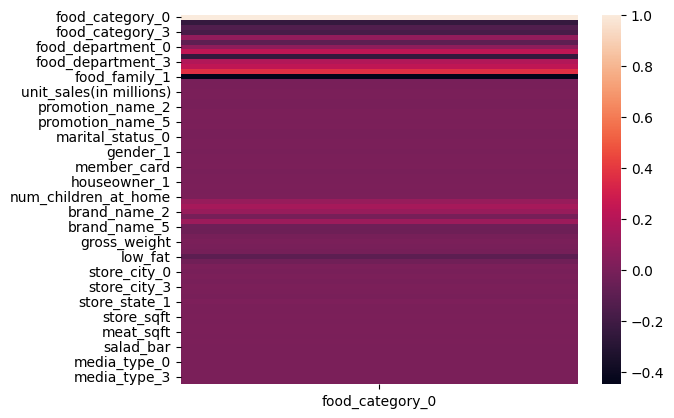

In [224]:
corr = train_encoded.corr()[["food_category_0"]]
sns.heatmap(corr)

In [225]:
import plotly.express as px

In [226]:
px.imshow(corr.T, aspect="auto")

In [227]:
array=train_encoded.values
array

array([[0.  , 0.  , 0.  , ..., 0.  , 1.  , 1.1 ],
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 3.05],
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.85],
       ...,
       [0.  , 1.  , 0.  , ..., 0.  , 1.  , 1.9 ],
       [0.  , 1.  , 0.  , ..., 0.  , 1.  , 3.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 1.  , 1.2 ]])

<Axes: >

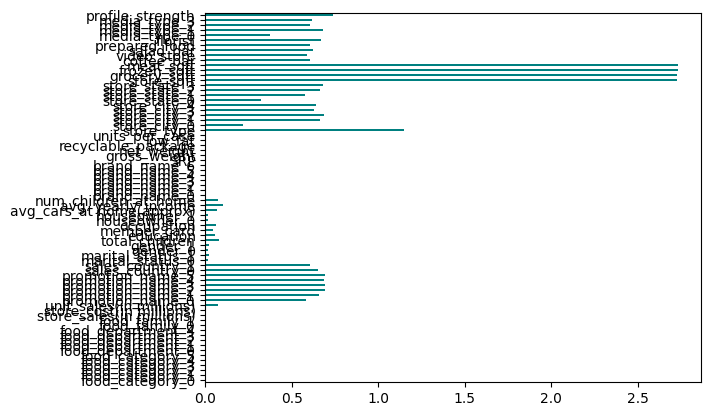

In [228]:
X = train_encoded.values
Y = train_label.values
from sklearn.feature_selection import mutual_info_regression
importance = mutual_info_regression(X,Y)
feat_importance = pd.Series(importance, train_encoded.columns[0: len(train_encoded.columns)])
feat_importance.plot(kind='barh', color='teal')

In [231]:
pd.DataFrame({"features": train_encoded.columns,
              "imp_values":list(feat_importance)})

,features,imp_values
0,food_category_0,0.005810
1,food_category_1,0.000525
2,food_category_2,0.000000
3,food_category_3,0.004195
4,food_category_4,0.000000
...,...,...
69,media_type_0,0.372959
70,media_type_1,0.682298
71,media_type_2,0.606257
72,media_type_3,0.613991


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso


# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 1e-05}


In [238]:
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X, y)

Lasso(alpha=1e-05)

In [ ]:
model = RandomForestRegressor(n_estimators=200)
model.fit(X, Y)
importances = model.feature_importances_
final_df = pd.DataFrame({'Features': train_encoded.columns, 'Importances': importances})

array([4.22441949e-01, 2.57795906e-01, 1.45374648e-01, 9.44852312e-03,
       8.11821703e-02, 1.15192079e-01, 1.46323331e+00, 4.03488595e-01,
       3.79594242e-01, 4.42834326e-01, 1.45487010e-01, 8.19019380e-02,
       4.99034900e-01, 1.87813180e+00, 9.15508786e-02, 2.10286121e+00,
       5.47248218e+00, 5.48632261e+00, 4.36088987e+00, 5.90814955e+00,
       2.92021989e+00, 6.50892460e+00, 1.37475574e+01, 1.56693128e+01,
       2.22619211e-01, 0.00000000e+00, 5.09191595e-01, 0.00000000e+00,
       6.84343686e-01, 3.22698700e-01, 8.09271601e-01, 1.20832671e-01,
       1.94135506e-01, 0.00000000e+00, 2.24820555e+00, 1.52442561e+00,
       3.99609957e-02, 9.52238375e-01, 8.90592680e-01, 8.11958098e-01,
       2.27188174e-01, 1.13477679e-01, 2.69235151e-01, 2.53058891e-01,
       1.13933542e+00, 9.47872856e-01, 1.36091855e+00, 6.57451092e-02,
       6.96343842e-02, 1.15072015e-01, 6.06629272e+00, 2.33128024e+01,
       6.73054568e-01, 4.64006477e-01, 2.06353665e+00, 8.44386435e+00,
      

In [ ]:
rf_scores = [8.25805895720761e-06,
 8.438753225054017e-06,9.096631525494988e-06,9.328965022741345e-06,1.0445053908316478e-05,1.059022721845523e-05,1.1608565808457207e-05,
 1.202070616925585e-05,1.3169718529956268e-05,1.4356922615742495e-05,1.450252159003259e-05,1.4750882017516455e-05,1.574204937469769e-05,1.6102990571706e-05,1.6267490790925494e-05,
 1.7073024148294906e-05,1.707612502352283e-05,2.0177811490068667e-05,2.0345240053480406e-05,2.3165410059507264e-05,2.3735432718961282e-05,2.4216932242450658e-05,
 4.1835105569604506e-05,4.920033623912994e-05,5.0742438579432066e-05,5.5354222799411386e-05,7.466779196383771e-05,7.74810630068639e-05,9.660913519609044e-05,0.00012894239432212278,0.00014176182151385443,
 0.00016280412419803717,0.00016669216731235732,0.00017401355937557563,0.00017902141457340728,0.00021342066366410674,0.00022029981290333232,
 0.00023545095922775273,0.00025291199769657263,0.0003034851858827029,0.0004072754509209013,0.0005238111906719061,0.0005586481924047002,0.0008545761400715929,
 0.0027649339351929975,0.0028676454126204,0.004957114849339047,0.006979078091752812,0.009327335360305843,0.010109761840046567,0.01065753040448454,
 0.012665224901038373,0.014759304666052277,0.01553679086644589,0.01567588286398062,0.015770834900926265,0.01586449930612134,0.018505978890027502,0.019233959297133663,
 0.03249316937449265,0.03283019971033377,0.03534453062895269,0.03710418721866079,0.04480726266880079,0.04489337232038254,0.047899049999421496,0.05126291341623357,
 0.05181224913080475,0.05623143440967328,0.06148043216834465,0.06556579667575808,0.07749861955613425,0.08174999960078086,0.09805143285460265]

inf_gain_df = pd.DataFrame({"features": cost_outlier.columns,"imp_values":list(inf_gain_scores)}).sort_values(by = ['imp_values'], ascending=False)
lasso_df = pd.DataFrame({"features": cost_outlier.columns,"imp_values":list(lasso_scores)}).sort_values(by = ['imp_values'], ascending=False)
rforest_df = pd.DataFrame({"features": cost_outlier.columns,"imp_values":list(rf_scores)}).sort_values(by = ['imp_values'], ascending=False)
#float-type features